In [2]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [3]:
files_field = ['chemistry_0207.csv','physics_0207.csv','neuro_0207.csv']
fields_rl = {}
for item in files_field:
    tp = pd.read_csv(item)
    tn = item.split('_')[0]
    fields_rl[tn] = tp

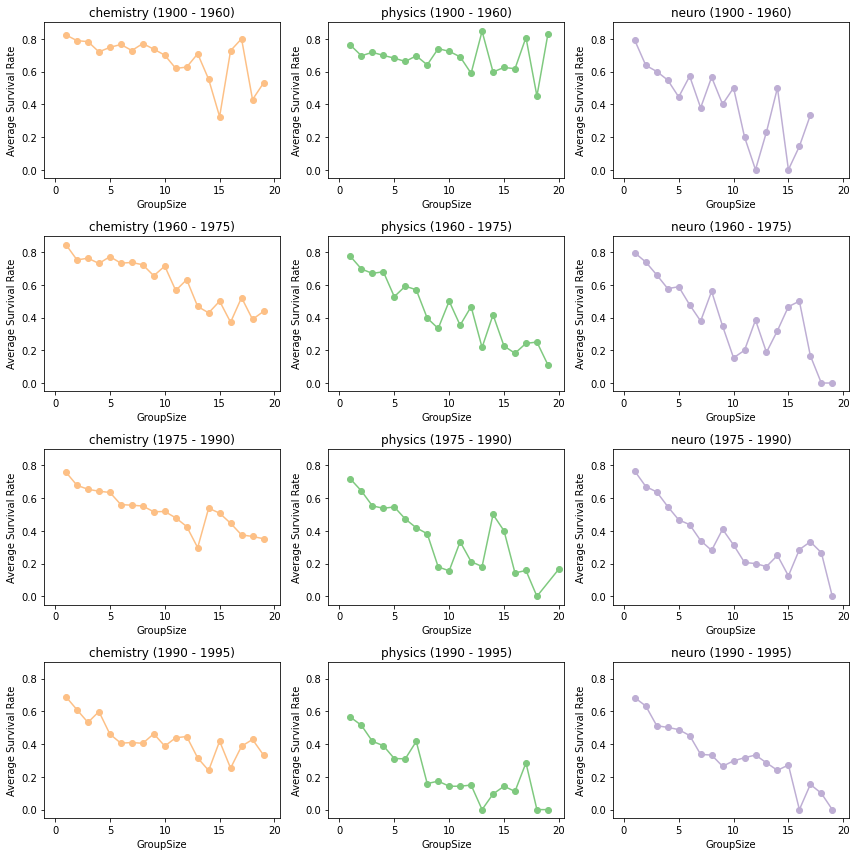

In [33]:
fields = ['chemistry','physics','neuro']
interval = [[1900,1960],[1960,1975],[1975,1990],[1990,1995]]
import matplotlib.colors as colors
rgb=([253,192,134],[127,201,127],[190,174,212])
rgb=np.array(rgb)/255
fig = plt.figure(figsize=(12,12),tight_layout=1)#figsize=(10,3.5)
for i in range(3):
    fds = fields_rl[fields[i]]
    J = range(4)
    #the first column: single field, different epoch
    for j in J: 
        inter = interval[j]
        chemi = fds[['NumOfMenteesOfTheMentor10','Survival0']][(inter[0]<fds['StopYear'])&(fds['StopYear']<=inter[1])]
        GroupSize = list(set(chemi.NumOfMenteesOfTheMentor10))
        SR = []
        for ii in GroupSize:
            sur_drop = chemi['Survival0'][ chemi['NumOfMenteesOfTheMentor10']==ii]
            sur = sur_drop[sur_drop==1]
            sur_rate = len(sur)/len(sur_drop)
#             print(sur_rate)
            SR.append(sur_rate)
        ax = fig.add_subplot(4,3,i+1+3*j)
        ax.plot(GroupSize[0:19],SR[0:19],marker='o',c=rgb[i]) 
        ax.set_xlabel('GroupSize')
        ax.set_ylabel('Average Survival Rate')
        ax.set_xlim([-1,20.5])
        ax.set_ylim([-0.05,0.9])
        ax.set_title(fields[i] + ' (' + str(interval[j][0]) + ' - '+  str(interval[j][1]) + ')' )
fig.savefig('linear negative relation.pdf')
            